In [12]:
from pyspark.sql import SparkSession

In [13]:
ss = SparkSession.builder.appName('Ecommerce').getOrCreate()

In [14]:
ss

In [15]:
df = ss.read.csv("Ecommerce Customers",header=True,inferSchema=True)

In [16]:
df.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [17]:
df.show()

+--------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+
|               Email|             Address|            Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+
|mstephenson@ferna...|    835 Frank Tunnel|              NULL|              NULL|              NULL|              NULL|                NULL|               NULL|
|         Wrightmouth|      MI 82180-9605"|            Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|   hduke@hotmail.com|  4547 Archer Common|              NULL|              NULL|              NULL|              NULL|                NULL|               NULL|
|         Diazchester|      CA 065

In [18]:
df = df.na.drop(how='any')

In [19]:
df.show()

+------------------+---------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|             Email|        Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+------------------+---------------+----------------+------------------+------------------+------------------+--------------------+-------------------+
|       Wrightmouth| MI 82180-9605"|          Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|
|       Diazchester| CA 06566-8576"|       DarkGreen|31.926272026360156|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|
|       Cobbborough| DC 99414-7564"|          Bisque|33.000914755642675|11.330278057777512| 37.11059744212085|   4.104543202376424| 487.54750486747207|
|        Port Jason| OH 22070-1220"|     SaddleBrown| 34.30555662975554|13.7175136651425

In [22]:
df.describe().show()

+-------+-----------+---------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|summary|      Email|        Address|     Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent|
+-------+-----------+---------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|  count|        454|            454|        454|               454|               454|               454|                 454|                454|
|   mean|       NULL|           NULL|       NULL|33.052615266528676|12.041631150369989| 37.05282185324883|   3.546803457297084| 499.91985771641924|
| stddev|       NULL|           NULL|       NULL|0.9976033530934668|0.9798699692713007|0.9978633723120236|  0.9920319137533512|   78.3257926883325|
|    min|Abigailstad|      AK 05665"|  AliceBlue|29.532428967057946| 8.508152176032603| 34.47687762925054|  0.26

In [25]:
df.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [29]:
df.select('Avatar').show()

+----------------+
|          Avatar|
+----------------+
|          Violet|
|       DarkGreen|
|          Bisque|
|     SaddleBrown|
|MediumAquaMarine|
|     FloralWhite|
|   DarkSlateBlue|
|          Salmon|
|          Tomato|
|       RoyalBlue|
|          Bisque|
|        DarkBlue|
|            Peru|
|      PowderBlue|
|       OliveDrab|
|            Cyan|
|   LightSeaGreen|
|       PeachPuff|
|           Wheat|
|            Teal|
+----------------+
only showing top 20 rows



In [30]:
df.count() ## number of rows

454

In [32]:
len(df.columns) # number of columns 

8

In [42]:
import pandas as pd
import seaborn as sns

In [40]:
pdf = df.toPandas()

In [41]:
pdf

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,Cobbborough,"DC 99414-7564""",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,Port Jason,"OH 22070-1220""",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,Port Jacobville,"PR 37242-1057""",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
449,Lake Jamiefurt,"UT 75292""",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
450,West Richard,"CA 19320""",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
451,South Chadburgh,"TN 56128""",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
452,Brendachester,"TX 05000-5873""",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [43]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

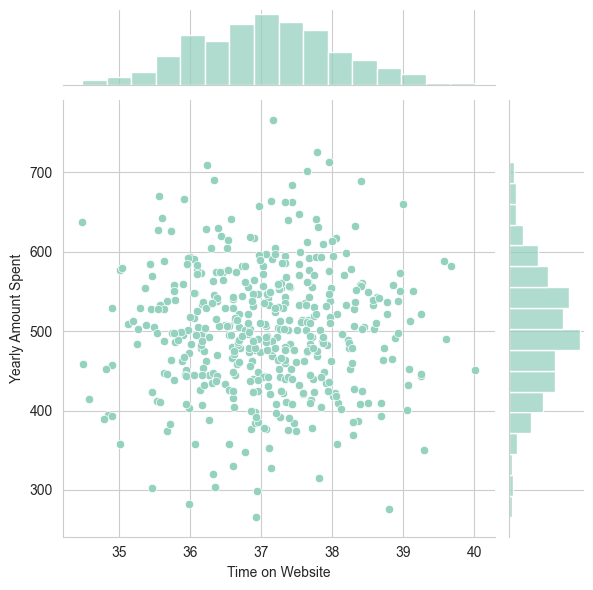

In [45]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=pdf)

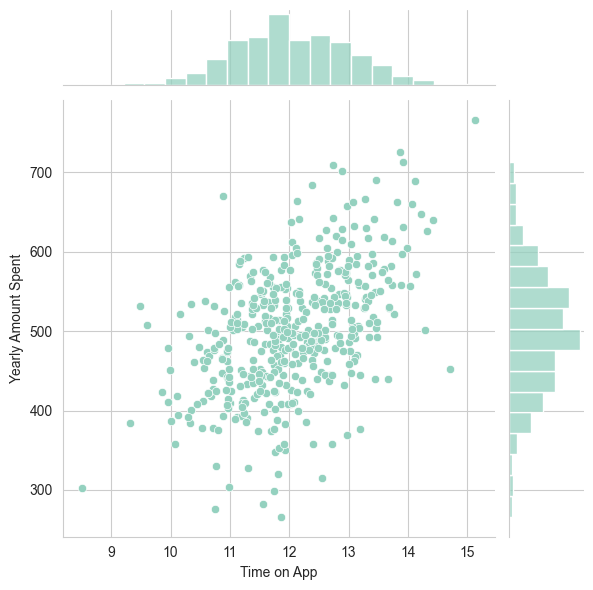

In [46]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=pdf)

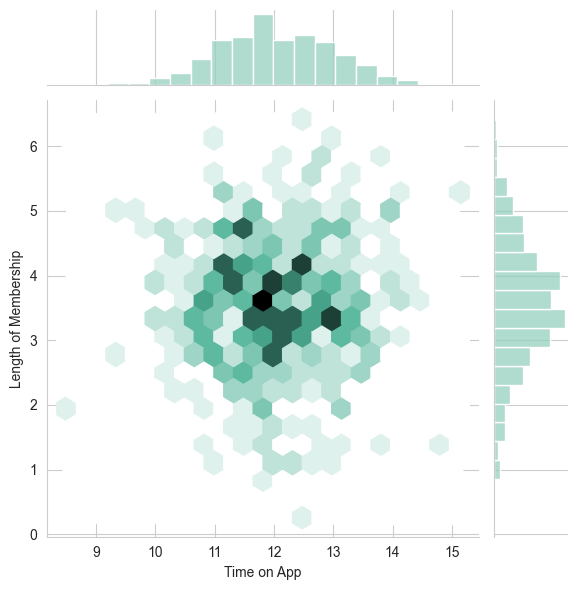

In [47]:
sns.jointplot(x='Time on App',y='Length of Membership',data=pdf,kind='hex')

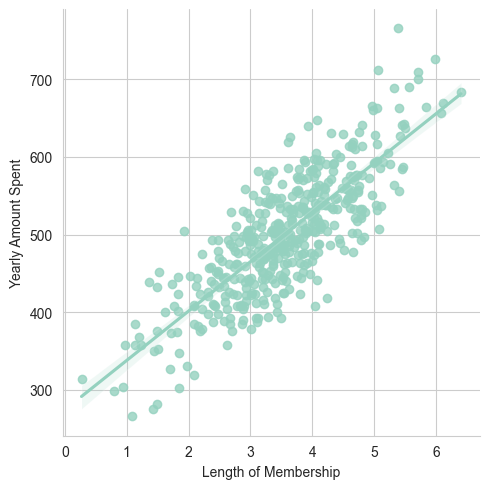

In [48]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=pdf)

## Training and testing the model

In [49]:
df.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [50]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols=['Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership'],outputCol='Independent feature')

In [51]:
output = va.transform(df)

In [52]:
output.show()

+------------------+---------------+----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|             Email|        Address|          Avatar|Avg Session Length|       Time on App|   Time on Website|Length of Membership|Yearly Amount Spent| Independent feature|
+------------------+---------------+----------------+------------------+------------------+------------------+--------------------+-------------------+--------------------+
|       Wrightmouth| MI 82180-9605"|          Violet| 34.49726772511229|12.655651149166752| 39.57766801952616|   4.082620632952961|  587.9510539684005|[34.4972677251122...|
|       Diazchester| CA 06566-8576"|       DarkGreen|31.926272026360156|11.109460728682564|37.268958868297744|    2.66403418213262|  392.2049334443264|[31.9262720263601...|
|       Cobbborough| DC 99414-7564"|          Bisque|33.000914755642675|11.330278057777512| 37.11059744212085|   4.104543202376424| 487

In [53]:
final_data = output.select('Independent feature','Yearly Amount Spent')
final_data.show()

+--------------------+-------------------+
| Independent feature|Yearly Amount Spent|
+--------------------+-------------------+
|[34.4972677251122...|  587.9510539684005|
|[31.9262720263601...|  392.2049334443264|
|[33.0009147556426...| 487.54750486747207|
|[34.3055566297555...|  581.8523440352178|
|[33.3306725236463...|  599.4060920457634|
|[33.8710378793419...|   637.102447915074|
|[32.0215955013870...|  521.5721747578274|
|[33.9877728956856...|  570.2004089636195|
|[33.9925727749537...|  492.6060127179966|
|[29.5324289670579...| 408.64035107262754|
|[33.1903340437226...|  573.4158673313865|
|[32.3879758531538...| 470.45273330095546|
|[30.7377203726281...|  461.7807421962299|
|[32.1253868972878...| 457.84769594494855|
|[32.3388993230671...|  407.7045475495441|
|[32.1878120459321...| 452.31567548003545|
|[32.6178560628234...|   605.061038804892|
|[32.9127851111597...|  534.7057438060227|
|[34.5075509985266...|  700.9170916173961|
|[33.0293319535068...| 423.17999168059777|
+----------

# Model Training

In [54]:
from pyspark.ml.regression import LinearRegression
train_data,test_data = final_data.randomSplit([0.75,0.25])
lr = LinearRegression(featuresCol='Independent feature',labelCol='Yearly Amount Spent')
lr = lr.fit(train_data)

In [55]:
lr.coefficients

DenseVector([25.8705, 38.2282, 0.8354, 61.3022])

In [65]:
res = lr.evaluate(test_data)
r= res.predictions

In [72]:
pr = r.select('prediction')
pr.show()

+------------------+
|        prediction|
+------------------+
| 331.9061549274277|
| 442.2292242608594|
|450.70302472196477|
|493.21206876598535|
| 461.9057634282492|
| 507.6994314412916|
|  427.002843261183|
| 568.7014760392965|
| 490.8226924813996|
| 427.6584248424581|
| 542.9371920661224|
|381.21620908952855|
| 417.7863057129082|
| 546.4373831671089|
|501.66885190230096|
| 518.0949104119488|
|449.73082437911125|
|  551.761463473468|
|389.85605710858863|
| 564.5774652692483|
+------------------+
only showing top 20 rows



In [59]:
res.meanAbsoluteError

8.442343341402335

In [74]:
res.meanSquaredError

111.180486690933

In [75]:
res.r2

0.9823852305809824

In [76]:
res.rootMeanSquaredError

10.544215793075034

In [80]:
df.createOrReplaceTempView("Ecomm")

In [82]:
df_res = ss.sql("Select Address from Ecomm")
df_res.show()

+---------------+
|        Address|
+---------------+
| MI 82180-9605"|
| CA 06566-8576"|
| DC 99414-7564"|
| OH 22070-1220"|
| PR 37242-1057"|
| MN 67218-7250"|
| WV 92213-0247"|
| SD 97450-0495"|
| WY 28244-9149"|
| MO 75696-5051"|
|      MP 42268"|
|      ND 44358"|
| OH 35641-3238"|
|      GA 15169"|
|      PW 88606"|
|      PW 63227"|
|      MT 57912"|
|      KY 50756"|
| WV 60804-4440"|
| ND 17957-5596"|
+---------------+
only showing top 20 rows

